# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [1]:
import pandas as pd
import holidays
import datetime as dt
from holidays import country_holidays
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

- Follow the example usage above to test if your files were created successfully.

In [2]:
# get list of files from folder
OUTPUT_FOLDER = 'Data/Chicago/'
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,41.803253,-87.608098
1,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
2,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
3,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
4,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
...,...,...,...,...,...,...,...,...,...,...,...,...
172382,13196745,09/02/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,212,2.0,4.0,41.830110,-87.610058
172383,13198188,09/02/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1623,16.0,45.0,41.974300,-87.758644
172384,13196743,09/02/2023 12:00:00 AM,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,1422,14.0,26.0,41.907311,-87.712836
172385,13197347,09/02/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1424,14.0,1.0,41.907663,-87.675387


In [3]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485888
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437088
2008    427183
2009    392827
2010    370514
2011    351993
2012    336320
2013    307537
2014    275790
2015    264788
2016    269827
2017    269103
2018    268905
2019    261336
2020    212210
2021    208847
2022    238901
2023    172387
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

## Topics and Answers

# Topic 3: Comparing AM vs PM Rush Hour
Q1:Are crimes more common during AM rush hour or PM rush hour?
You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
You can consider any crime that occurred between 4 -7 PM as PM rush hour. 
A1: There is equal number of crime during AM and PM rush hour.
Q2:What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
A2: Motor Vehicle Thefts are more common during AM rush hour. 

AM Crimes:
1. Motor Vehicle Thefts
2. Property Damage
3. Vehicle Damage 

PM Crimes:
1. Theft $500 and under

2. Domestic Battery 
3. Finanical Identity Theft over $300 dollars

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7885610 entries, 0 to 172386
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 676.8+ MB


In [7]:
df['Hour']= df['Date'].dt.hour
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Hour
0,1410662,2001-01-01 01:00:00,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,41.803253,-87.608098,1
1,1330412,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623,1
2,1328315,2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929,1
3,1311626,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,1
4,1310586,2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856,1


In [23]:
HourCounts = df['Hour'].value_counts().sort_index()

In [24]:
HourCounts

0     451985
1     250360
2     211248
3     171073
4     130231
5     108731
6     126601
7     180386
8     266720
9     340548
10    334145
11    349469
12    452410
13    373879
14    397045
15    419607
16    398156
17    405248
18    430852
19    443520
20    441891
21    428544
22    421689
23    351272
Name: Hour, dtype: int64

In [12]:
AMCrime = HourCounts[[7, 8, 9, 10]]

In [19]:
PMCrime = HourCounts[[16, 17, 18, 19]]

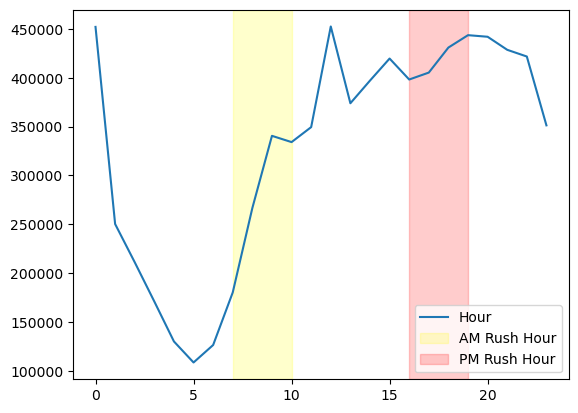

In [35]:
ax = HourCounts.plot()
ax.axvspan(7,10, alpha=.2, color='yellow', label='AM Rush Hour')
ax.axvspan(16,19, alpha=0.2, color='red', label='PM Rush Hour')
ax.legend()

In [ ]:
df['']

In [ ]:
## Get # of crimes by Hour
crimes_by_hour = df.groupby('Description')['Date'].value_counts().sort_index()
crimes_by_hour

In [ ]:
crimes_by_hour.plot();

In [ ]:
## convert to dataframe and reset_index()
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

In [ ]:
ax = sns.lineplot(data=plot_df, x='Date',y='# of Crimes')

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='Date',y='# of Crimes',markers=True,
                  hue='Description',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

In [ ]:
g = sns.catplot(data=plot_df, x='Date', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Description', col='Description',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [ ]:
crime_perc_by_hour = df.groupby('Description')['Date'].value_counts(normalize=True).sort_index()
crime_perc_by_hour

In [ ]:
## Convert to dataframe and reset index
plot_df_perc = crime_perc_by_hour.to_frame('# of Crimes').reset_index()
plot_df_perc

In [ ]:
# looping through the value counts series
val_counts_by_hour = df.groupby('Description')['Date'].value_counts()
val_counts_by_hour

In [ ]:
## Getting all of the crimes from the first level of the index
crime_list = val_counts_by_hour.index.levels[0]
crime_list

In [ ]:
g = sns.catplot(data=plot_df_perc, x='Date', y='# of Crimes',
                hue='Description', col='Description',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = val_counts_by_hour.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig

# Topic 4: Comparing Months
Q1. What months have the most crime? What months have the least?

Q2.Are there any individual crimes that do not follow this pattern? If so, which crimes?

A1. During the Prime Summer months between April- August there is a spike in crime and during the Prime Winter months of October- January there is a spike in crime as well. Months of February, March, and September have the least amount of crime. 

A2. There are no individual crimes that do not follow this pattern.

# Topic 5: Comparing Holidays:
Q1: Are there any holidays that show an increase in the # of crimes?
Q2: Are there any holidays that show a decrease in the # of crimes?

A1. The main holiday that showed an increase of crime is New Years Day. 

A2. There are no  holidays that show a decrease in the # of crime.

In [ ]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

In [ ]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

In [ ]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

In [ ]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

In [ ]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

In [ ]:
## US Holidays
df['US Holiday'].value_counts()

In [ ]:
## MD Holidays
df['MD Holiday'].value_counts()

In [ ]:
## Saving a binary is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()